<a href="https://colab.research.google.com/github/GoldFiiish/semester2nd/blob/master/TransferLearningClassifier_usingVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions



In [0]:
base_model=tensorflow.keras.applications.VGG16(weights='imagenet',include_top=False) 
#imports the mobilenet model and discards the last 1000 neuron layer.

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x)

In [0]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
display(train_datagen)
train_generator=train_datagen.flow_from_directory('gdrive/My Drive/covid_db', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 746 images belonging to 2 classes.


In [0]:
print(train_generator.batch_size)
print(train_generator.n//train_generator.batch_size)

1
746


In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/12
746/746 [==============================] - 21s 28ms/step - loss: 0.6831 - accuracy: 0.6421
Epoch 2/12
746/746 [==============================] - 21s 28ms/step - loss: 0.4960 - accuracy: 0.7560
Epoch 3/12
746/746 [==============================] - 21s 28ms/step - loss: 0.4424 - accuracy: 0.7815
Epoch 4/12
746/746 [==============================] - 21s 28ms/step - loss: 0.4302 - accuracy: 0.7949
Epoch 5/12
746/746 [==============================] - 21s 28ms/step - loss: 0.3991 - accuracy: 0.8284
Epoch 6/12
746/746 [==============================] - 21s 28ms/step - loss: 0.3655 - accuracy: 0.8338
Epoch 7/12
746/746 [==============================] - 21s 28ms/step - loss: 0.3442 - accuracy: 0.8391
Epoch 8/12
746/746 [==============================] - 21s 28ms/step - loss: 0.3235 - accuracy: 0.8539
Epoch 9/12
746/746 [==============================] - 21s 28ms/step - loss: 0.3198 - accuracy: 0.8606
Epoch 

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=320x320 at 0x7F9AEE077390>
(320, 320)
(320, 320)
(224, 224, 1)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

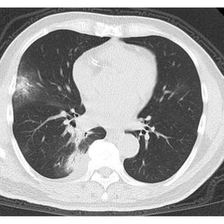

[0]


In [0]:
from numpy import zeros, newaxis

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://www.researchgate.net/publication/341389174/figure/fig1/AS:891265684082690@1589505706803/CT-findings-in-a-51-year-old-male-patient-with-critical-COVID-19-who-had-type-I_Q320.jpg",
    #"https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSAk7Zvt0eF6E8j6NjToCmiN4sioKHpJVas9ELBqhmu57vtjsrY&usqp=CAU",
    #"https://careguideforpets.com/wp-content/uploads/2020/01/german-shepherd-main.jpg",
    #"https://archive.content.aah.net.au/files/images/german-shepherd-head-tilt.jpg",
    #"https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ1meaMgJuPHbitAtfHWI2PUyuVqdt2WBKlzIMCaeuu5brCEpvR&usqp=CAU",
    #"https://img.pixers.pics/pho_wat(s3:700/FO/57/85/21/98/700_FO57852198_85c778be6b2cec92c684cfc1898a7308.jpg,700,582,cms:2018/10/5bd1b6b8d04b8_220x50-watermark.png,over,480,532,jpg)/wall-murals-bulldog-puppy.jpg.jpg"
    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    #img = np.expand_dims(img, axis=3)
    print(img)
    print(np.shape(img))
    #img[:, :, newaxis]
    print(np.shape(img))

    #plt.imshow(img, cmd='rgb')
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    #x[:, :, newaxis]
    print(x.shape)

    wi, he , ch= x.shape
    print(wi)

    xx = np.empty((wi, he, 3), dtype=np.uint8)
    xx[:, :, 0] = x[:, : ,0]
    xx[:, :, 1] = x[:, : ,0]
    xx[:, :, 2] = x[:, : ,0]
    print(np.shape(xx))

    xx = np.expand_dims(xx, axis=0)
    print(np.shape(xx))

    xx = preprocess_input(xx)
    pred = model.predict(xx)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))



